### Plot the phase-resolved observations in an inclinated orbit

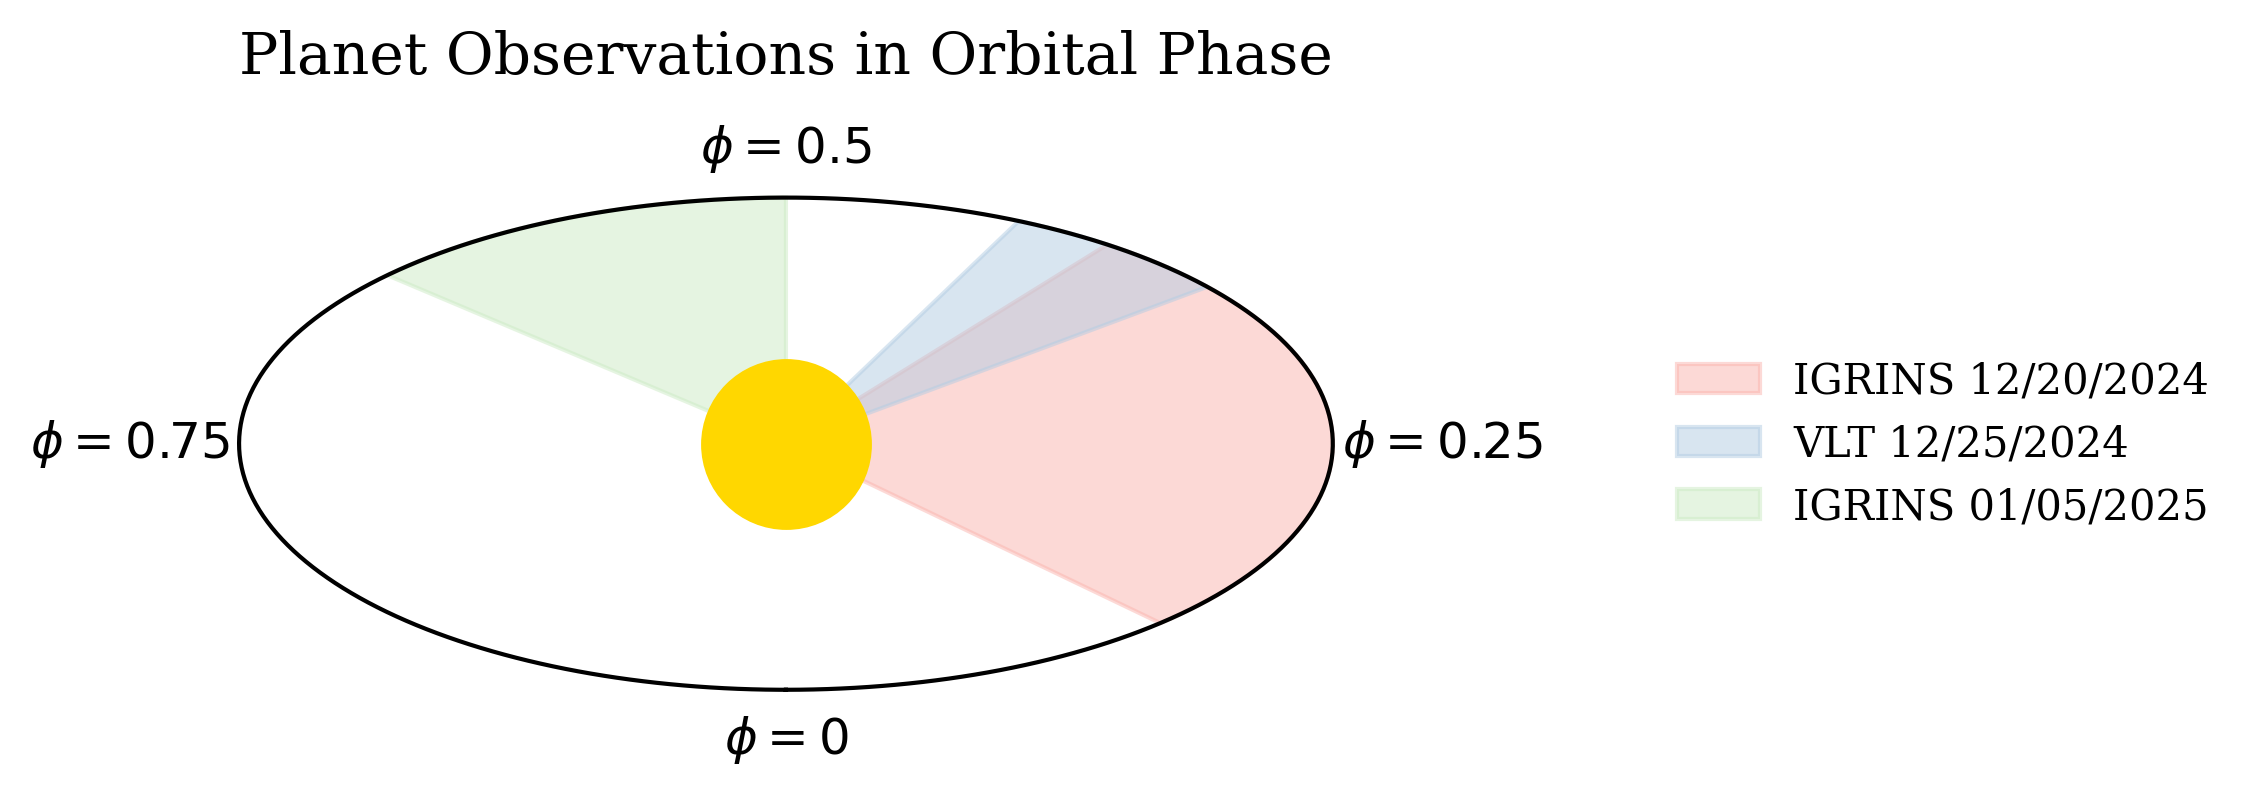

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_orbital_phase_fans_inclined(phases, visit_labels=None,
                                     title='Planet Observations in Orbital Phase',
                                     inclination=0.5, label_padding=1, font_family='serif'):
    """
    Plot an inclined (elliptical) orbital phase diagram with filled fan arcs from the star.
    Zero phase is at the bottom (theta=0 points down) and goes counterclockwise.
    
    Parameters:
        phases : list of tuples
            Each tuple is (start_phase, end_phase) between 0 and 1
        visit_labels : list of str
            Strings to show in the legend for each visit (e.g., 'IGRINS 12/20/2024')
        title : str
            Plot title
        inclination : float
            Scaling of y-axis to simulate viewing angle (1=circular, <1=tilted)
        label_padding : float
            Padding for phi labels and visit dates
        font_family : str
            Font family for all text
    """
    plt.rcParams['font.family'] = font_family
    
    def phase_to_angle(phase):
        return phase * 2 * np.pi
    
    cmap = plt.get_cmap('Pastel1')
    colors = [cmap(i % cmap.N) for i in range(len(phases))]
    
    fig, ax = plt.subplots(figsize=(7,6), dpi=300)  # slightly wider for legend
    angle_offset = -np.pi/2  # zero at bottom
    
    # Draw full orbit
    theta_full = np.linspace(0, 2*np.pi, 500)
    x_full = np.cos(theta_full + angle_offset)
    y_full = np.sin(theta_full + angle_offset) * inclination
    ax.plot(x_full, y_full, color='k', linestyle='-', linewidth=1)
    
    # Draw each phase as a filled fan and create legend handles
    legend_handles = []
    for idx, ((start, end), color) in enumerate(zip(phases, colors)):
        theta_arc = np.linspace(phase_to_angle(start), phase_to_angle(end), 200)
        x_arc = np.concatenate(([0], np.cos(theta_arc + angle_offset)))
        y_arc = np.concatenate(([0], np.sin(theta_arc + angle_offset) * inclination))
        fan = ax.fill(x_arc, y_arc, color=color, alpha=0.5)
        
        # Prepare legend entry
        if visit_labels is not None and idx < len(visit_labels):
            legend_handles.append((fan[0], visit_labels[idx]))
    
    # Star at center
    ax.plot(0, 0, 'o', markersize=40, color='gold')
    
    # Phi labels
    phi_ticks = [0, 0.25, 0.5, 0.75]
    for phi in phi_ticks:
        angle = phase_to_angle(phi) + angle_offset
        x_tick = (1 + label_padding) * np.cos(angle)
        y_tick = (1 + label_padding) * np.sin(angle) * inclination
        ax.text(x_tick, y_tick, fr'$\phi={phi}$', ha='center', va='center', fontsize=12, fontfamily=font_family)
    
    # Add legend outside the figure
    if legend_handles:
        handles, labels = zip(*legend_handles)
        ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.15, 0.5),
                  frameon=False, fontsize=10)
    
    # Formatting
    ax.set_aspect('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2*inclination, 1.2*inclination)
    ax.axis('off')
    ax.set_title(title, fontsize=14, pad=18, fontfamily=font_family)
    
    # Adjust subplot so legend fits
    fig.subplots_adjust(right=0.75)
    
    plt.show()

# Example usage
visits = [(0.12, 0.4), (0.36, 0.43), (0.5, 0.63)]
labels = ['IGRINS 12/20/2024', 'VLT 12/25/2024', 'IGRINS 01/05/2025']
plot_orbital_phase_fans_inclined(visits, visit_labels=labels, inclination=0.45, label_padding=0.2)


#### In a circular orbit

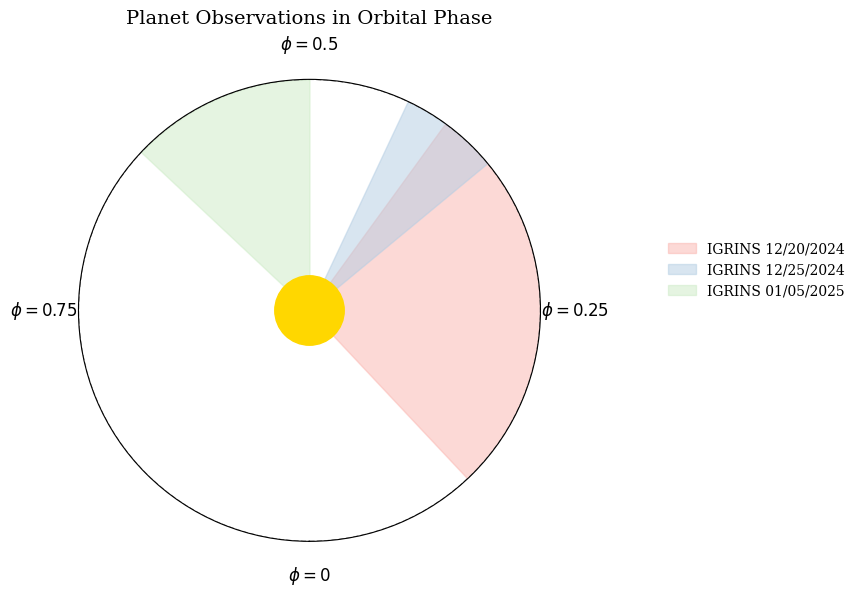

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_orbital_phases(phases, visit_labels=None, title='Planet Observations in Orbital Phase',
                        label_padding=0.15, font_family='serif'):
    """
    Plot a circular orbital phase diagram with arcs for observed phases.
    Zero phase at bottom, counterclockwise.
    
    Parameters:
        phases : list of tuples
            Each tuple is (start_phase, end_phase) between 0 and 1
        visit_labels : list of str
            Labels for each visit, e.g., 'IGRINS 12/20/2024', to include in legend
        title : str
            Plot title
        label_padding : float
            Padding for phi labels and visit legend markers
        font_family : str
            Font family for all text
    """
    plt.rcParams['font.family'] = font_family
    
    def phase_to_angle(phase):
        return phase * 2 * np.pi
    
    # Pastel colors
    cmap = plt.get_cmap('Pastel1')
    colors = [cmap(i % cmap.N) for i in range(len(phases))]
    
    fig, ax = plt.subplots(figsize=(7,6), subplot_kw={'projection': 'polar'})
    
    # Zero at bottom, counterclockwise
    ax.set_theta_zero_location('S')
    ax.set_theta_direction(1)
    
    orbit_radius = 1
    
    # Draw phase fans and prepare legend handles
    legend_handles = []
    for idx, ((start, end), color) in enumerate(zip(phases, colors)):
        theta_start = phase_to_angle(start)
        theta_end = phase_to_angle(end)
        theta_arc = np.linspace(theta_start, theta_end, 200)
        fan = ax.fill_between(theta_arc, 0, orbit_radius, color=color, alpha=0.5)
        
        # Legend handle
        if visit_labels is not None and idx < len(visit_labels):
            legend_handles.append((fan, visit_labels[idx]))
    
    # Star in center
    ax.plot(0, 0, marker='o', markersize=50, color='gold')
    
    # Orbit circle
    circle = plt.Circle((0,0), orbit_radius, transform=ax.transData._b,
                        color='gray', fill=False, linestyle='--')
    ax.add_artist(circle)
    
    # Phi labels with padding
    phi_ticks = [0, 0.25, 0.5, 0.75]
    for phi in phi_ticks:
        angle = phase_to_angle(phi)
        ax.text(angle, orbit_radius + label_padding, fr'$\phi={phi}$',
                ha='center', va='center', fontsize=12, fontfamily=font_family)
    
    # Formatting
    ax.set_ylim(0, orbit_radius)
    ax.set_yticks([])  # remove radial ticks
    ax.set_xticks([])  # remove polar angular ticks
    ax.grid(False)
    
    # Add legend outside the plot
    if legend_handles:
        handles, labels = zip(*legend_handles)
        ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(1.25, 0.5),
                  frameon=False, fontsize=10)
    
    ax.set_title(title, pad=40, fontsize=14, fontfamily=font_family)
    
    plt.show()

# Example usage
visits = [(0.12, 0.4), (0.36, 0.43), (0.5, 0.63)]
labels = ['IGRINS 12/20/2024', 'IGRINS 12/25/2024', 'IGRINS 01/05/2025']
plot_orbital_phases(visits, visit_labels=labels, label_padding=0.15)
